# Understanding the Psychological and Behavioural Impact of Binge-Watching on Netflix Viewers

**Source**: [Netflix Life Impact Dataset (NLID) on Kaggle](https://www.kaggle.com/datasets/towhid121/netflix-life-impact-dataset-nlid)

## Key Features of the Dataset

### 🎬 Emotional Metrics
- **Life-Changing Timestamp**: Exact minute marking the film’s transformative moment  
  _e.g., Whiplash’s drumming finale at 1:20:00_
- **Meaningful Advice**: Concise takeaways viewers adopted  
  _e.g., Coco’s “Honor your roots”_

### 👥 Audience Behavior
- **Discovery Channels**: How viewers found the film  
  _e.g., 92% of The Pursuit of Happyness viewers were referred by friends_
- **Shareability**: Percentage of viewers who recommended the film’s lesson  
  _e.g., 97% for Klaus_

### 📊 Rigorous Curation
- Combines **quantitative metrics** (ratings, reviews) with **qualitative depth** (review highlights, emotional impact)


# Data Loading & Initial Audit

## Import Libraries 

In [35]:
import pandas as pd  # to read the data
import numpy as np   # data transformation
import matplotlib.pyplot as plt  # to visualize 
import seaborn as sns
import re


## Load Dataset

In [36]:
# Load the dataset 
df = pd.read_csv('Netflix_dataset.csv')

In [37]:
# preview the 5 first rows
df.head()

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y


## Initial Data Overview

In [38]:
# Number of rows and coumns (shape)
print('Shape of the dataset',df.shape)

Shape of the dataset (82, 10)


The dataset contains 82 rows and 10 columns

In [39]:
# Data type
df.dtypes

Movie Title                             object
Genre                                   object
Release Year                             int64
Average Rating                         float64
Number of Reviews                        int64
Review Highlights                       object
Minute of Life-Changing Insight         object
How Discovered                          object
Meaningful Advice Taken                 object
Suggested to Friends/Family (Y/N %)     object
dtype: object

Most columns are text, with a few numerical ones (Rating, Reviews, Year)—useful for both analysis and visualization.

In [40]:
# Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Movie Title                            0
Genre                                  0
Release Year                           0
Average Rating                         0
Number of Reviews                      0
Review Highlights                      0
Minute of Life-Changing Insight        0
How Discovered                         0
Meaningful Advice Taken                0
Suggested to Friends/Family (Y/N %)    0
dtype: int64


No missing values found—dataset is complete and ready for processing.

## Statistical Summary

In [41]:
# Display statistical summary 
print(df.describe(include ='all'))            

                     Movie Title  Genre  Release Year  Average Rating  \
count                         82     82     82.000000       82.000000   
unique                        82     22           NaN             NaN   
top     The Pursuit of Happyness  Drama           NaN             NaN   
freq                           1     24           NaN             NaN   
mean                         NaN    NaN   2018.304878        7.547561   
std                          NaN    NaN      2.365853        1.097160   
min                          NaN    NaN   2006.000000        4.000000   
25%                          NaN    NaN   2017.250000        6.925000   
50%                          NaN    NaN   2019.000000        7.800000   
75%                          NaN    NaN   2020.000000        8.300000   
max                          NaN    NaN   2021.000000        9.400000   

        Number of Reviews                                  Review Highlights  \
count           82.000000                  

**Interpretation**

**Movie Title and Review Highlights:** All 82 movies have unique titles and review highlights, confirming no duplicates in these fields.

**Genre:** 22 distinct genres are present, with Drama being the most common (24 times).

**Release Year:** Ranges from 2006 to 2021, with an average around 2018.

**Average Rating:** Scores range from 4.0 to 9.4, with a mean of 7.55, indicating generally well-received content.

**Number of Reviews:** Varies from 8,000 to 65,000, showing a wide range of audience reach.

**How Discovered:** Most viewers discovered films through Netflix originals (48 out of 82).

**Meaningful Advice Taken:** Almost all entries are unique, reflecting diverse personal lessons learned.

**Suggested to Friends/Family (Y/N %):** Highest repeated value is “75% Y”, showing viewers often recommended the films to others.



# Data Cleaning & Feature Engineering

## Columns renaming 
Replace white space with underscore and convert it to lowercase 

In [42]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['movie_title', 'genre', 'release_year', 'average_rating',
       'number_of_reviews', 'review_highlights',
       'minute_of_life-changing_insight', 'how_discovered',
       'meaningful_advice_taken', 'suggested_to_friends/family_(y/n_%)'],
      dtype='object')

##  Extracting single review from `review_highlights` column

In [43]:
df['review_highlights']= df['review_highlights'].str.split('.').str[0].str.strip()

In [44]:
df.head(3)

,movie_title,genre,release_year,average_rating,number_of_reviews,review_highlights,minute_of_life-changing_insight,how_discovered,meaningful_advice_taken,suggested_to_friends/family_(y/n_%)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y


## Split `minute_of_life_changing_insight` column into two

In [45]:
 
def splitInsights(insight):
    insight = str(insight).strip() # Converting the text(insights) into string
    insight = re.sub(r'[–—_]', '-', insight) #It is maintaing the uniformity of matching the patterns by removing all double dashes with -
    match = re.match(r'(?:(\d+):)?(\d+):(\d+)\s*-\s*(.*)', insight)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0  # Default to 0 if no hours provided
        minutes = int(match.group(2))
        seconds = int(match.group(3))
        description = match.group(4).strip()
 
        totalSeconds = hours * 3600 + minutes * 60 + seconds
        return pd.Series([totalSeconds, description])
    return pd.Series([np.nan, None])
 
 
df[['insight_sec', 'insight_dec']] = df['minute_of_life-changing_insight'].apply(splitInsights)
df.head()                   

,movie_title,genre,release_year,average_rating,number_of_reviews,review_highlights,minute_of_life-changing_insight,how_discovered,meaningful_advice_taken,suggested_to_friends/family_(y/n_%),insight_sec,insight_dec
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y,4695,Chris gets the job
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y,760,Algorithm manipulation
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y,4320,The flood scene
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y,1990,Paddington’s jail speech
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y,3922,Cobb’s totem scene


## Split the column `suggested_to_friends/family_(y/n_%)` into three columns

In [46]:

df[['suggest(%)', 'suggest_flag']]=df['suggested_to_friends/family_(y/n_%)'].str.extract(r'(\d+)%\s*([YN])')
df['suggest(%)'] =df['suggest(%)'].astype(float)
df['suggest_flag'] = df['suggest_flag'].map({'Y':True, 'N':False})

df['suggest_level']=pd.cut(df['suggest(%)'], bins=[0,70,85,100], labels=['Low', 'Medium','High'])

df.head()

,movie_title,genre,release_year,average_rating,number_of_reviews,review_highlights,minute_of_life-changing_insight,how_discovered,meaningful_advice_taken,suggested_to_friends/family_(y/n_%),insight_sec,insight_dec,suggest(%),suggest_flag,suggest_level
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y,4695,Chris gets the job,92.0,True,High
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y,760,Algorithm manipulation,88.0,True,High
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y,4320,The flood scene,85.0,True,Medium
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y,1990,Paddington’s jail speech,95.0,True,High
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y,3922,Cobb’s totem scene,80.0,True,Medium


In [91]:
df.to_csv('cleaned_netflix_dataset.csv', index=False)

# Exploratory Data Analysis (EDA)

In [81]:
# EDA Theme
sns.set_theme(style='whitegrid', palette='Greens')

## Genre Distribution

Text(0.5, 1.0, 'Genre Distribution')

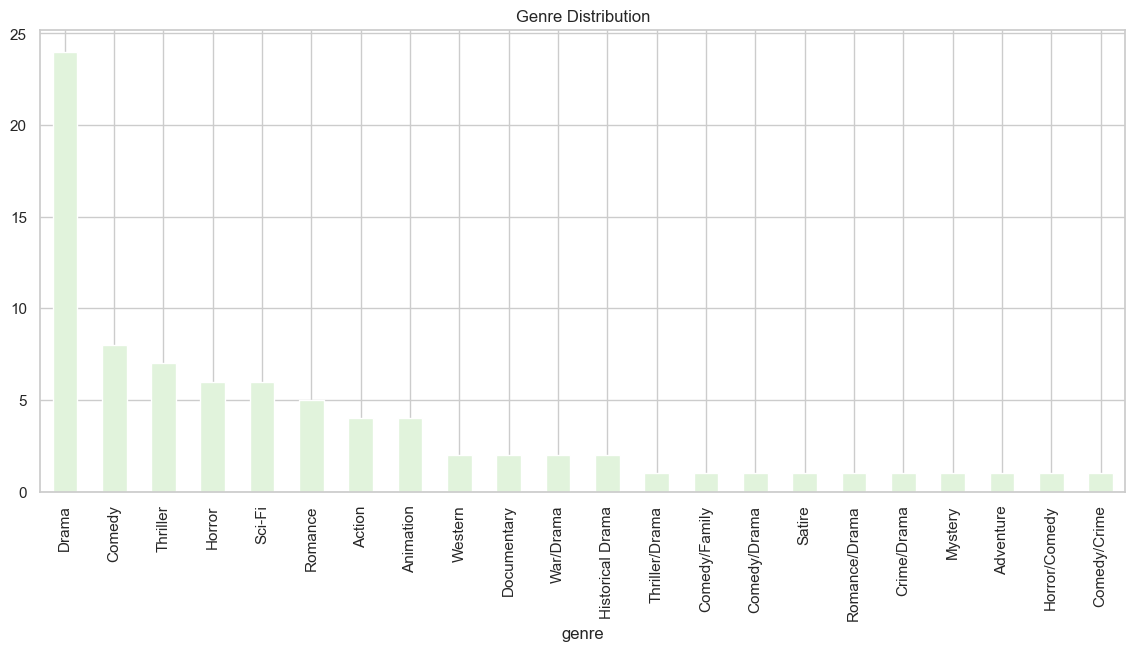

In [82]:

plt.figure(figsize=(14,6))
df['genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')


**Interpretation**

Drama is by far the most dominant genre, with nearly 24 titles, significantly higher than any other.
The dataset clearly emphasizes emotional and dramatic storytelling.

## Number of releases per years

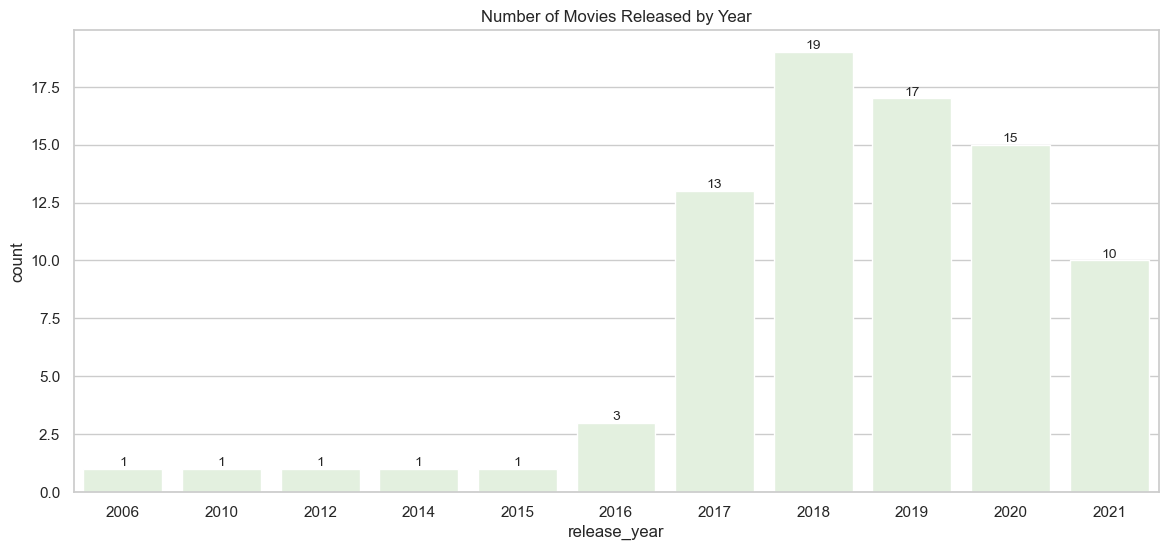

In [49]:

plt.figure(figsize=(14,6))
ax=sns.countplot(data=df, x='release_year', order= sorted(df['release_year'].unique()))
# Add counts on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Number of Movies Released by Year')
plt.show()

**Interpretation**

Most movies were released between 2017 and 2021, with 2018 standing out as the year with the highest number of releases.

## Distribution of Insight Timing (Seconds)

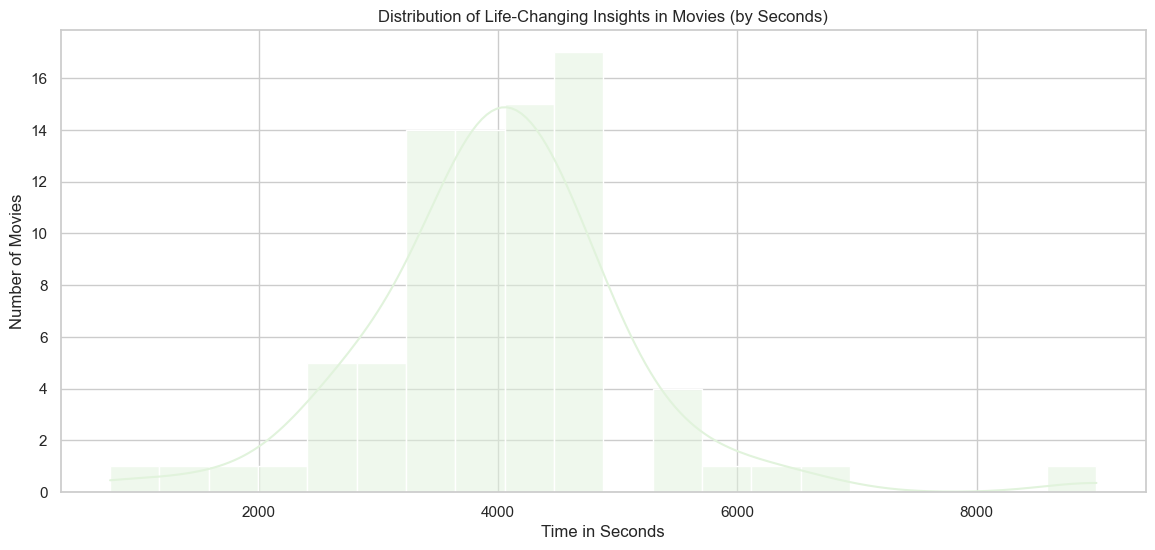

In [50]:
#Show when (early/middle/end) emotional moments happen in the movies.

plt.figure(figsize=(14,6))
sns.histplot(df['insight_sec'], bins=20, kde=True)
plt.title('Distribution of Life-Changing Insights in Movies (by Seconds)')
plt.xlabel('Time in Seconds')
plt.ylabel('Number of Movies')
plt.show()

**Interpretation**

Most life-changing insights occur between 3,000 and 5,000 seconds into the film (roughly 50 to 83 minutes), suggesting these impactful moments typically happen in the middle to later parts of the movies. Very few occur early on.

## How Viewers Discovered the Movies

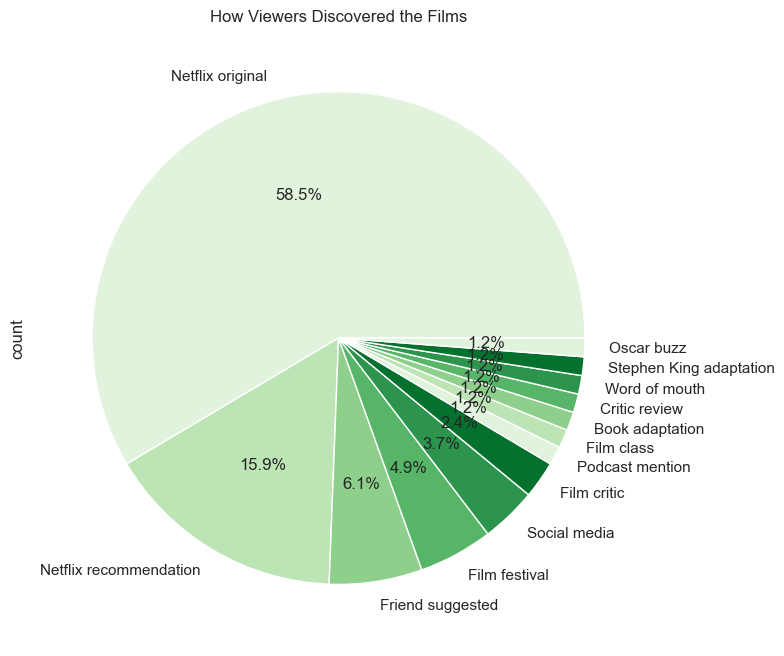

In [51]:
# Understand the influence of referrals.

df['how_discovered'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('How Viewers Discovered the Films')
plt.show()


**Interpretation**

Most viewers (58.5%) discovered the films as Netflix originals, followed by Netflix recommendations (15.9%) and friend suggestions (6.1%). Other sources like film festivals, social media, and critics played smaller roles.                
Netflix’s own platform (originals + recommendations) plays the biggest role in helping viewers discover movies.

## Shareability by Suggest Level.

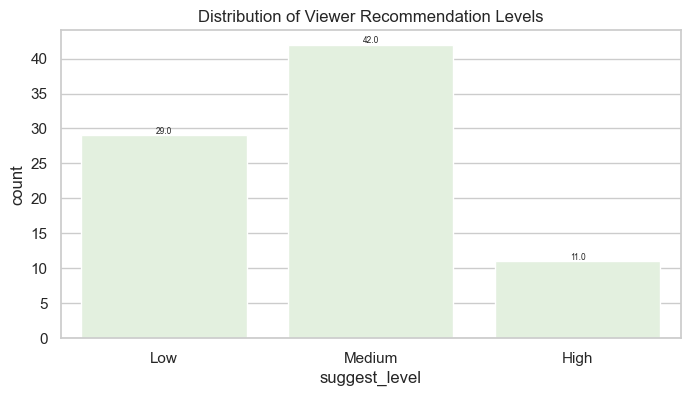

In [52]:
# How strongly viewers recommend movies.
plt.figure(figsize=(8,4))
ax=sns.countplot(data=df, x='suggest_level')
plt.title('Distribution of Viewer Recommendation Levels')
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=6)
plt.show()


**Interpretation**

Most viewers fall into the "Medium" recommendation category (42), followed by "Low" (29), with only 11 giving "High" recommendations. This suggests moderate viewer satisfaction, with limited strong enthusiasm, indicating potential areas for improvement.

## Shareability by Genre

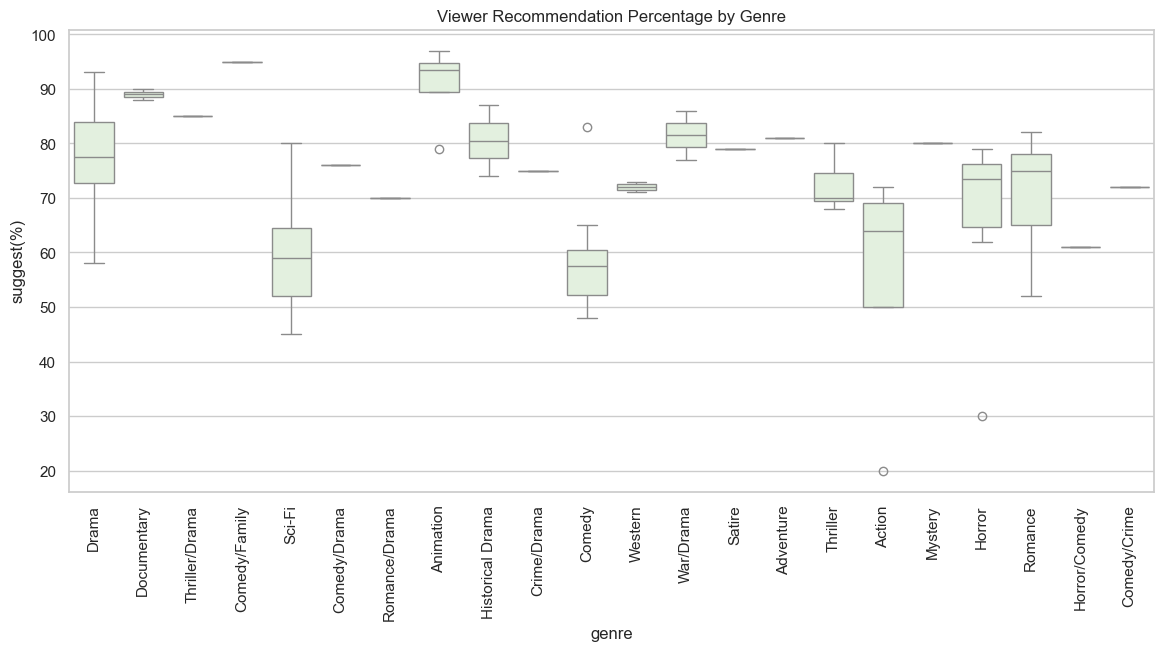

In [53]:
#See which genres are more “share-worthy”.

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='genre', y='suggest(%)')
plt.xticks(rotation=90)
plt.title('Viewer Recommendation Percentage by Genre')
plt.show()

**Interpretation**

This box plot reveals the distribution of viewer recommendation percentages (`suggest(%)`) across genres, offering insight into variability and consistency in emotional impact.

- **High Median & Low Variability**:  
  Genres like **Documentary**, **Comedy/Family**, and **Animation** show high median suggestion rates with tight interquartile ranges, indicating consistent emotional resonance across titles.

- **High Variability Genres**:  
  Genres such as **Thriller**, **Horror**, and **Satire** display wide spreads and outliers, suggesting uneven emotional impact — some titles are highly recommended, while others fall flat.

- **Lower Median Genres**:  
  **Action**, **Comedy**, and **Sci-Fi** tend to have lower median suggestion rates, reinforcing earlier findings that these genres may prioritize entertainment over emotional depth.

**📌 Implication**

This visualization complements the scatter and summary plots by showing not just averages, but **distributional behavior**. It highlights which genres reliably deliver emotionally resonant experiences and which are more hit-or-miss. These insights can guide content strategy, genre prioritization, and emotional targeting in recommendations.


## Average Rating by Genre

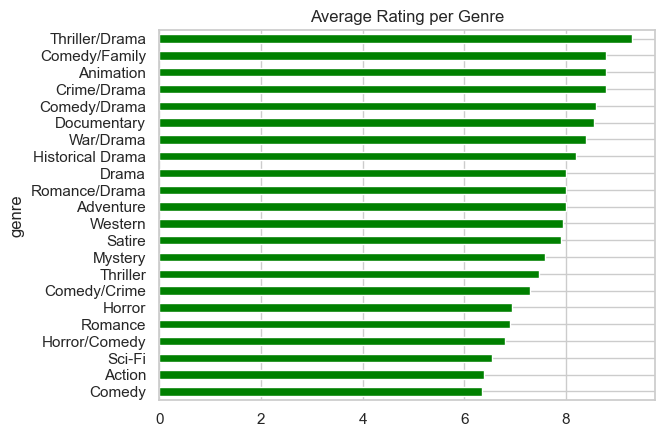

In [85]:
#Compare how different genres are rated.

df.groupby('genre')['average_rating'].mean().sort_values().plot(kind='barh', color='green')
plt.title('Average Rating per Genre')
plt.show()

**Interpretation**

The graph shows that Thriller/Drama holds the highest average rating, above 8, alongside Animation, Comedy/Family, Cinema/Drama, Comedy/Drama, Documentary, War/Drama, and Historical Drama. All other genres score less than 8 on average

## Correlation Between Reviews and Rating

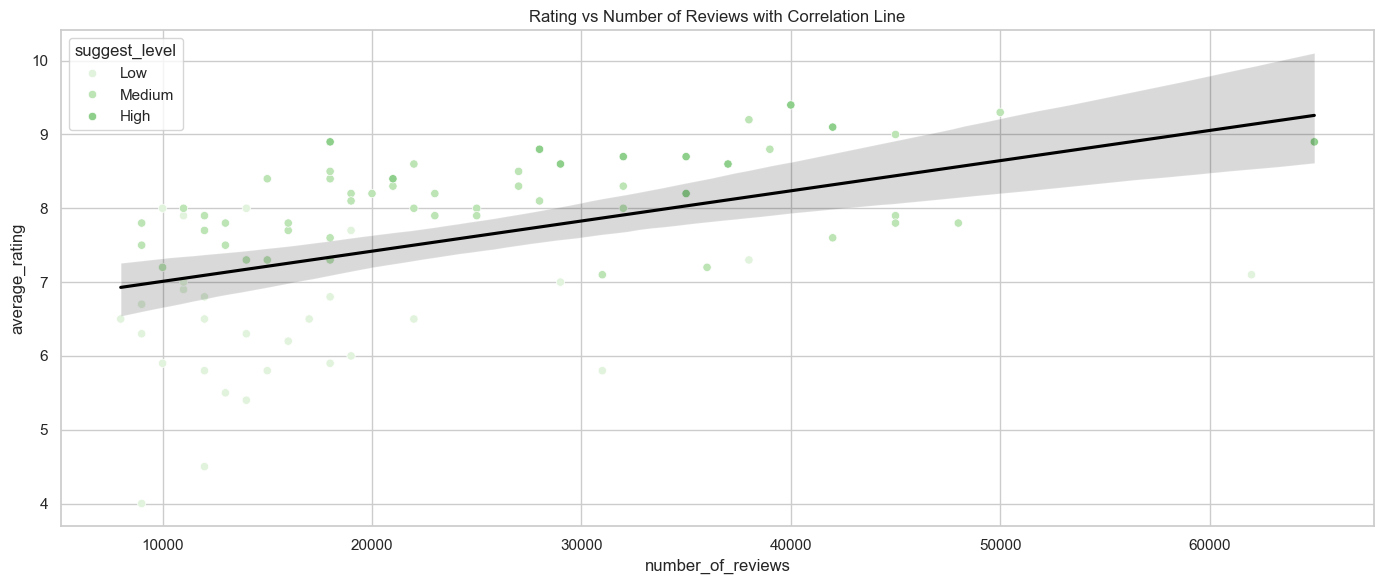

In [55]:
#Determine if more reviews lead to better or worse ratings.

plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='number_of_reviews', y='average_rating', hue='suggest_level')
sns.regplot(data=df, x='number_of_reviews', y='average_rating',
            scatter=False, color='black') 
plt.title('Rating vs Number of Reviews with Correlation Line')
plt.tight_layout()
plt.show()

**Interpretation**

The plot shows a positive correlation between the number of reviews and average rating. Movies with more reviews tend to have slightly higher ratings, indicating that popular titles may also be better received by viewers.


## Timeline of Insight Moments Across Movies

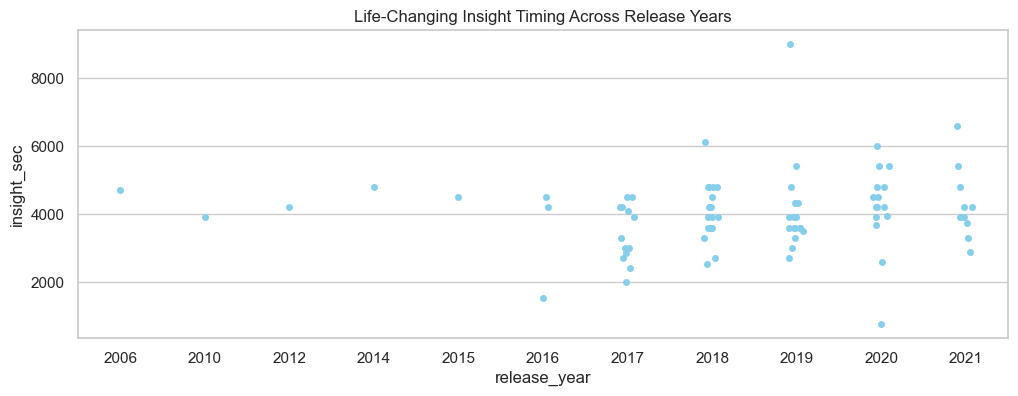

In [56]:
#Visualize where most life-changing insights occur over movie timeline.

plt.figure(figsize=(12,4))
sns.stripplot(data=df, x='release_year', y='insight_sec', jitter=True, color='skyblue')
plt.title('Life-Changing Insight Timing Across Release Years')
plt.show()

**Interpretation**

Life-changing insights are most densely clustered between 2,000 to 5,000 seconds, especially in films released after 2016. This suggests a growing trend of placing impactful moments in the middle or later parts of recent movies.

## Descriptive statistics

In [57]:
num_col= df.select_dtypes(include=[np.number]) # select all the numerical columns in the dataset
num_col

df.columns

desc_summary = pd.DataFrame({
   'Mean': df.mean(numeric_only=True),
   'Median': df.median(numeric_only= True),
   'Mode': df.mode(numeric_only= True).iloc[0],
   'variance': df.var(numeric_only= True),
   'Std': df.std(numeric_only= True),
   'Skewness': df.skew(numeric_only= True),
   'Kuurtosis': df.kurt(numeric_only= True)
})

##or we can do it using the dataframe mum_col
#desc_summary1 = pd.DataFrame({
#   'Mean': num_col.mean(),
#   'Median': num_col.median(),
#   'Mode': num_col.mode().iloc[0],
#   'variance': num_col.var(),
#   'Std': num_col.std(),
#   'Skewness': num_col.skew(),
#   'Kuurtosis': num_col.kurt() 
#})

desc_summary

,Mean,Median,Mode,variance,Std,Skewness,Kuurtosis
release_year,2018.304878,2019.0,2018.0,5.597260e+00,2.365853,-2.478822,9.829926
average_rating,7.547561,7.8,8.0,1.203759e+00,1.097160,-0.840577,0.644843
number_of_reviews,23146.341463,19000.0,18000.0,1.637561e+08,12796.722141,1.137015,0.936889
insight_sec,4021.719512,3933.0,4200.0,1.220205e+06,1104.628939,0.828810,5.055668
suggest(%),72.621951,74.5,70.0,1.927072e+02,13.881901,-1.083708,2.213152
suggest_flag,1.000000,1.0,True,0.000000e+00,0.000000,0.000000,0.000000


## Emotional Insights by Genre

Animated Plotly bar chart showing timestamped emotional moments by genre.

In [58]:
import plotly.express as px

df_genre= df[['insight_sec','insight_dec', 'genre']]
fig=px.bar(df_genre, x='insight_dec', y='insight_sec',
           color='insight_dec',
           animation_frame='genre',
           color_discrete_sequence=px.colors.sequential.Purples,
           title=' Insights from Genre',
           labels={'insight_dec':'insights', 'insight_sec':'Seconds'}
          )
fig.show()


## Skewness & Kurtosis Visualization

### Distribution of Release Years

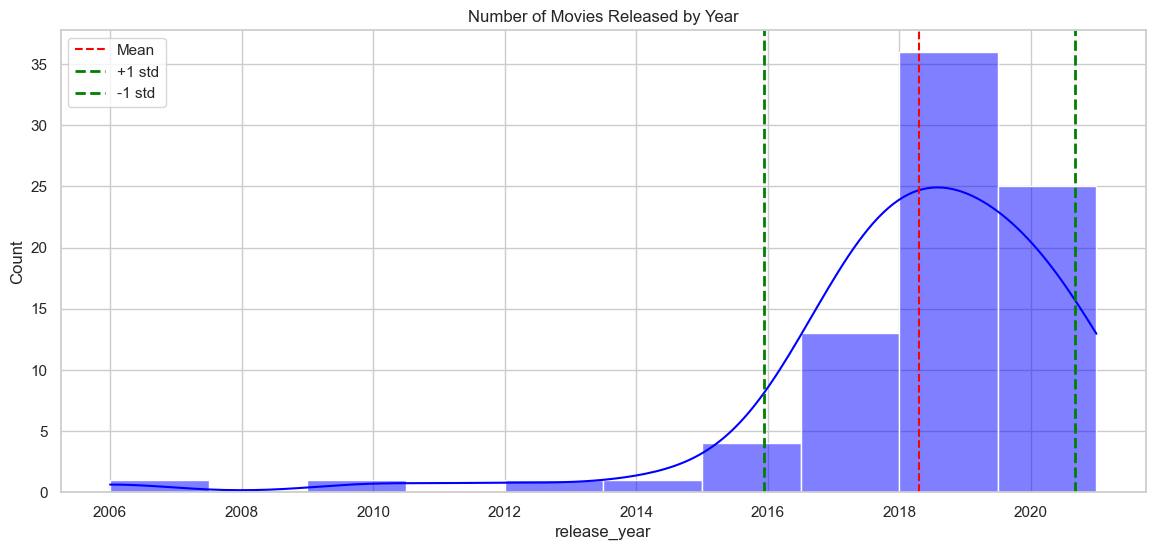

In [59]:
mean= df['release_year'].mean()
std = df['release_year'].std()

plt.figure(figsize=(14,6))
sns.histplot(data= df['release_year'], bins=10, kde=True, color='blue')

plt.axvline(mean, color='red', linestyle='--', label='Mean')

plt.axvline(mean + std, color='green', linestyle='--', linewidth=2, label='+1 std')
plt.axvline(mean - std, color='green', linestyle='--', linewidth=2, label='-1 std')

plt.title('Number of Movies Released by Year')
plt.legend()
plt.show()

**Interpretation**

This histogram shows the count of movies released each year from 2006 to 2021. Overlaid on it are:

we can see a sharp increase in movie production starting in 2016, peaking around 2018–2019, then slightly declining afterward.
Movie counts from 2006 to 2014 are very low, often with only 1 or 2 movies per year.

The distribution is left-skewed, meaning most data is concentrated in the later years (right side), with a long tail on the left (2006–2014). These early years are fewer and drag the distribution slightly left.

The distribution is leptokurtic, meaning it has a sharp peak (around 2018–2019) and heavy tails, which further emphasizes the presence of outliers on the low end (early years).


Movie releases between 2006 and 2014 can be considered outliers, as they fall outside the main distribution range and occur with much lower frequency. This is supported by a left-skewed, leptokurtic distribution with a peak centered around 2018–2019.

# Hypothesis Test
We apply statistical tests to validate assumptions about viewer ratings and genre impact.

## T-Test: Ratings Before vs After 2015

**Hypothesis**

**H0:** there is no significance relationship or effect on the basis of average relation of movie release before and after 2015

**H1:** there is significance relationship or effect on the basis of average relation of movie release before and after 2015

In [60]:
from scipy import stats
df['post2015']=df['release_year']>2015

before_2015=df[df['post2015']==False]['average_rating']
after_2015=df[df['post2015']==True]['average_rating']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   movie_title                          82 non-null     object  
 1   genre                                82 non-null     object  
 2   release_year                         82 non-null     int64   
 3   average_rating                       82 non-null     float64 
 4   number_of_reviews                    82 non-null     int64   
 5   review_highlights                    82 non-null     object  
 6   minute_of_life-changing_insight      82 non-null     object  
 7   how_discovered                       82 non-null     object  
 8   meaningful_advice_taken              82 non-null     object  
 9   suggested_to_friends/family_(y/n_%)  82 non-null     object  
 10  insight_sec                          82 non-null     int64   
 11  insight_dec          

In [61]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(before_2015, after_2015)
print(f'T-Statistics{t_stat}, p_Value: {p_value}')

T-Statistics2.7376763180007413, p_Value: 0.007622947723985303


**Interpretation** 

p_value< 0.05

Due to the lack of evidence we reject the null hypothesis, this means there is a significant diffrences between the movies released before and after 2015

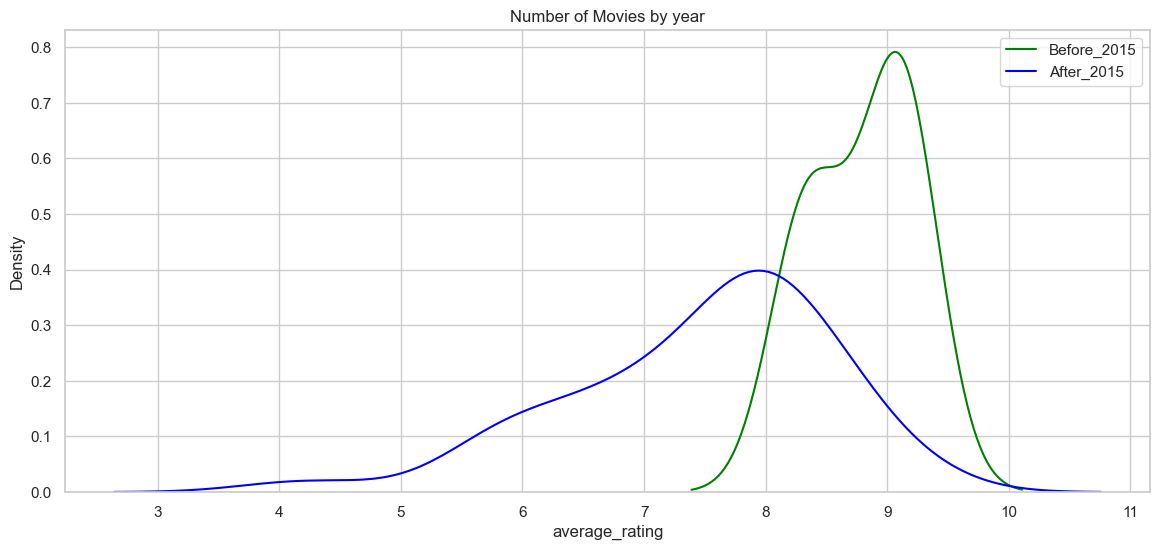

In [69]:
plt.figure(figsize=(14,6))
sns.kdeplot(before_2015, color='green', label='Before_2015' )

sns.kdeplot(after_2015, color='blue', label='After_2015' )

plt.title('Number of Movies by year')
plt.legend()
plt.show()

## ANOVA

### Ratings Across Gen
**Hypothesis**

**H0:** The mean rating is the same in all genre

**H1:** There is at least one genre with different rating
    

In [ ]:
groups= [group['average_rating'].dropna() for name, group in df.groupby('genre') if len(group)>1]
anova_results= stats.f_oneway(*groups)

print(f'F-Statistics: {anova_results.statistic}; p_Value: {anova_results.pvalue}')

**Interpretation**

p_Value < 0.05
This means the null hypothesis is rejected and there is at least one genre with different rating

### Suggestion Rate by Discovery Method

**Hypothesis**

- **H₀ (Null Hypothesis)**: The mean suggestion rate is the same across all discovery methods.
- **H₁ (Alternative Hypothesis)**: At least one discovery method leads to a different suggestion rate.

**Methodology**

We grouped the dataset by `how_discovered` and calculated the average suggestion percentage. Then, we applied a one-way ANOVA test to determine if the differences between groups are statistically significant.

In [65]:
# Grouping by discovery method and calculating mean suggestion percentage
discovery_suggestion = df.groupby('how_discovered')['suggest(%)'].mean().sort_values(ascending=False)
print(discovery_suggestion)

# ANOVA test: Does discovery method affect suggestion rate?
groups = [group['suggest(%)'].dropna() for name, group in df.groupby('how_discovered') if len(group) > 1]
anova_result = stats.f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")


how_discovered
Word of mouth              93.000000
Podcast mention            90.000000
Friend suggested           87.200000
Oscar buzz                 85.000000
Social media               83.666667
Film class                 82.000000
Book adaptation            81.000000
Stephen King adaptation    79.000000
Film festival              77.500000
Netflix recommendation     75.153846
Critic review              73.000000
Film critic                73.000000
Netflix original           67.750000
Name: suggest(%), dtype: float64
F-statistic: 3.1271, p-value: 0.0133


**Interpretation**

The ANOVA test yielded an **F-statistic of 3.13** and a **p-value of 0.0133**, which is below the 0.05 significance threshold. This indicates that the method by which viewers discover a movie has a statistically significant effect on how likely they are to recommend it.

From the group averages:

- **Word of mouth (93%)**, **Podcast mention (90%)**, and **Friend suggested (87.2%)** lead the highest recommendation rates.
- In contrast, **Netflix original (67.75%)**, **Film critic (73%)**, and **Critic review (73%)** show lower shareability.

These results suggest that **social and personal discovery channels** (e.g., friends, podcasts) foster stronger emotional engagement and recommendation behavior than algorithmic or institutional sources.

📌 **Implication**: Netflix and content creators may benefit from amplifying social discovery mechanisms — such as referral prompts, shareable moments, or influencer mentions — to boost viewer engagement and organic reach.


# Behavioral Patterns & Correlations

## 📈 Rating vs Suggestion Correlation

                average_rating  suggest(%)
average_rating        1.000000    0.929553
suggest(%)            0.929553    1.000000


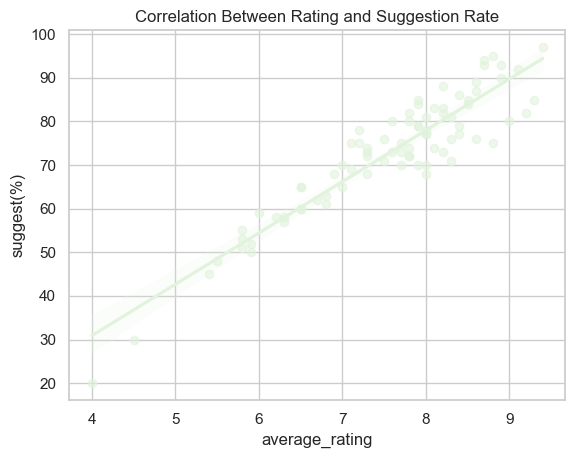

In [66]:
# Correlation between average rating and suggestion percentage
correlation = df[['average_rating', 'suggest(%)']].corr()
print(correlation)

# Visualize with regression plot
sns.regplot(data=df, x='average_rating', y='suggest(%)', scatter_kws={'alpha':0.6})
plt.title('Correlation Between Rating and Suggestion Rate')
plt.show()


**Interpretation**

The Pearson correlation coefficient between **average rating** and **suggestion percentage** is **0.93**, indicating a **strong positive linear relationship**. This means that as the average rating of a movie increases, viewers are significantly more likely to recommend it to others.

The accompanying regression plot visually reinforces this trend: movies with higher ratings tend to cluster near the top of the suggestion scale, often exceeding 85–90%.

📌 **Implication**: Viewer perception of quality (as reflected in ratings) is a powerful driver of shareability. Content teams and recommendation engines may benefit from prioritizing highly rated titles when designing social prompts or referral features.


## Emotional Themes in Advice (Keyword Frequency)

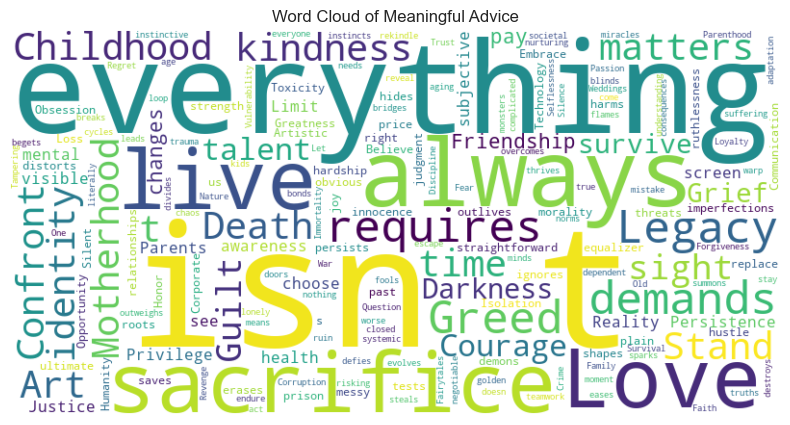

In [89]:
# Word Cloud for Meaningful Advice
from wordcloud import WordCloud
text = " ".join([str(a) for a in df['meaningful_advice_taken'].dropna()])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Meaningful Advice")
plt.show()

**Interpretation**

This WordCloud chart highlights the most frequently used emotional keywords in the “Meaningful Advice Taken” column. These words reflect the psychological resonance and personal values viewers associate with impactful Netflix content.

Notable themes include:

- **Sacrifice**, **love**, and **kindness** — suggesting that viewers are drawn to stories of emotional depth and moral reflection.
- **Legacy**, **greed**, and **time** — pointing to introspective takeaways about ambition, relationships, and life priorities.
- **Requires**, **demands**, and **stand** — indicating a recurring motif of perseverance and personal growth.

📌 **Implication**: 
These emotional signals can guide content creators and strategists in curating narratives that foster deeper viewer engagement and reflection. They also validate the dataset’s richness in capturing qualitative impact beyond ratings.


## Outliers in Impact vs Rating

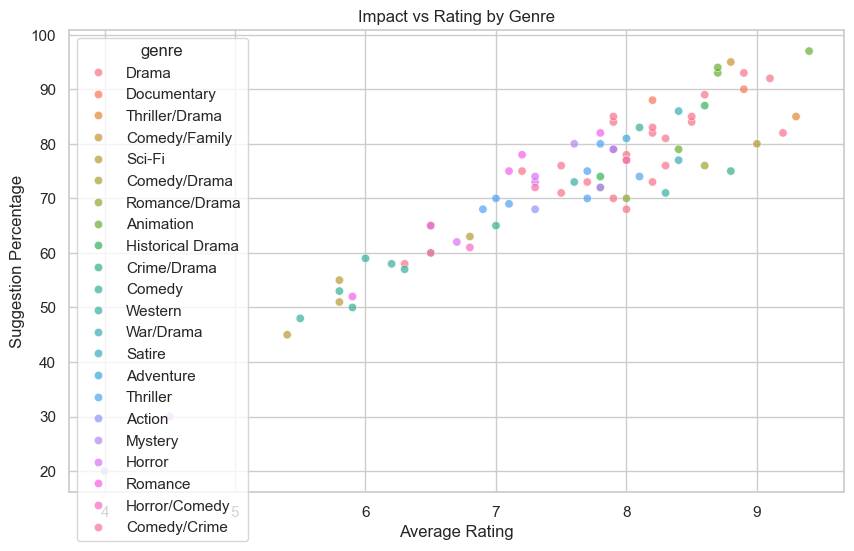

In [68]:
# Scatter plot to detect outliers
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='average_rating', y='suggest(%)', hue='genre', alpha=0.7)
plt.title('Impact vs Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Suggestion Percentage')
plt.show()


**Interpretation**

While the scatter plot do not reveal statistical outliers. The strong correlation (r = 0.93) between average rating and suggestion percentage suggests a consistent relationship across genres. This reinforces the idea that viewer-perceived quality is a reliable predictor of shareability, with no genre dramatically defying the trend.


### Pair Plot of Key Numerical Features

This pair plot provides a comprehensive view of the relationships between four key behavioral and emotional metrics:

- **Average Rating**
- **Number of Reviews**
- **Insight Timing (Seconds)**
- **Suggestion Percentage**

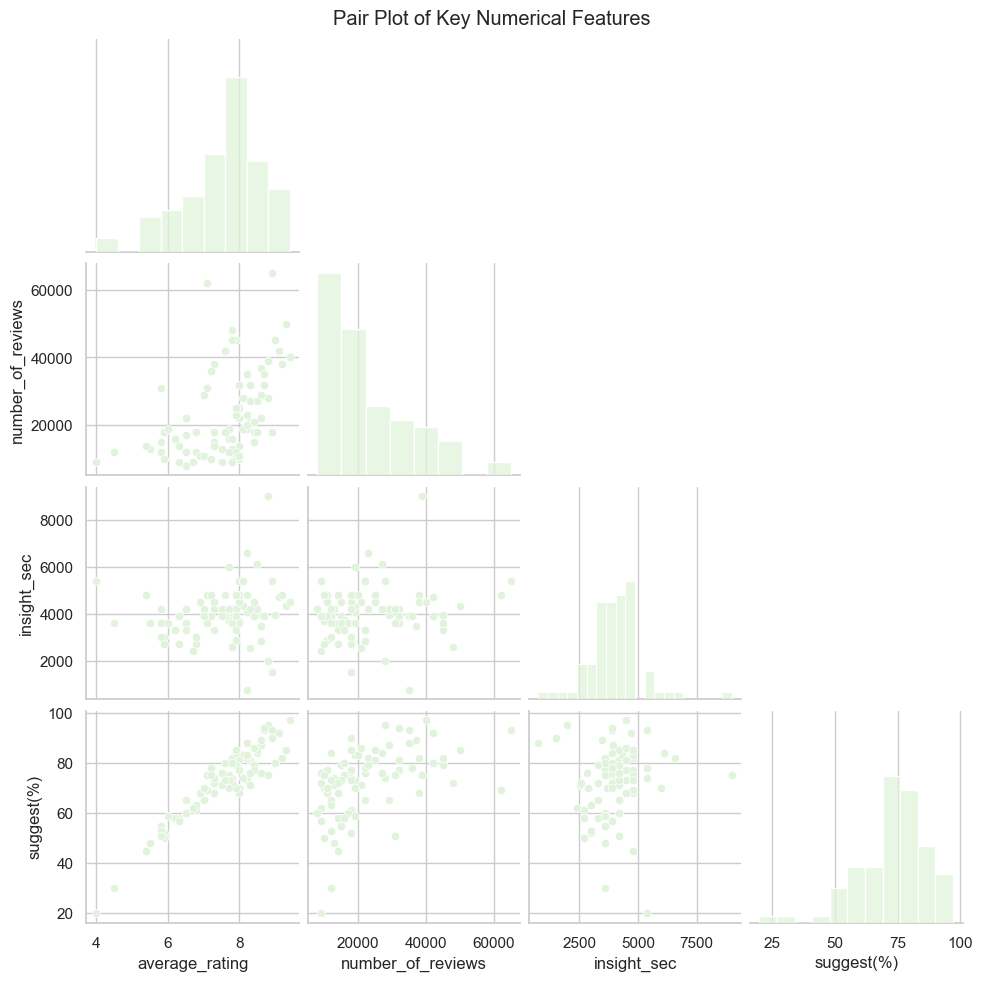

In [87]:
# Pair Plot
sns.pairplot(
    df[['average_rating', 'number_of_reviews', 'insight_sec', 'suggest(%)']],
    corner = True
)
plt.suptitle("Pair Plot of Key Numerical Features")
plt.subplots_adjust(top = 0.95)
plt.show()


**Interpretation**

- **Strong positive correlation** between `average_rating` and `suggest(%)`, confirming earlier findings.
- **Insight Timing** shows a wide distribution, with no clear linear relationship to rating or suggestion — emotional impact can occur at any point in a film.
- **Number of Reviews** appears loosely correlated with both rating and suggestion, suggesting that engagement volume may reinforce perceived quality and shareability.

**📌 Implication**

The pair plot validates the consistency of behavioral relationships across variables and helps identify subtle clusters or nonlinear patterns. It reinforces the idea that emotional resonance and viewer advocacy are multifactorial — influenced by content quality, timing of impact, and audience engagement.

This visualization serves as a diagnostic checkpoint before transitioning to recommendations and future scope.


# Recommendations & Future Scope

## Recommendations
- Promote emotionally resonant content
- Encourage reflective reviews
- Prioritize relatable human stories

## Future Scope
- Add viewer demographics
- Apply NLP for sentiment scoring
- Include watch time and completion rate
